Using TensorFlow backend.


Train on 8485 samples, validate on 2829 samples
Epoch 1/5
8485/8485 [==============================] - 1s 133us/step - loss: 2.1735 - acc: 0.4648 - val_loss: 1.3031 - val_acc: 0.7469
Epoch 2/5
8485/8485 [==============================] - 1s 105us/step - loss: 0.8717 - acc: 0.8323 - val_loss: 0.8211 - val_acc: 0.8063
Epoch 3/5
8485/8485 [==============================] - 1s 100us/step - loss: 0.5119 - acc: 0.9006 - val_loss: 0.6835 - val_acc: 0.8172
Epoch 4/5
8485/8485 [==============================] - 1s 101us/step - loss: 0.3538 - acc: 0.9347 - val_loss: 0.6158 - val_acc: 0.8353
Epoch 5/5
2829/2829 [==============================] - 0s 65us/step
LOSS: 0.58051288856892
ACCURACY: 0.8366914391517639


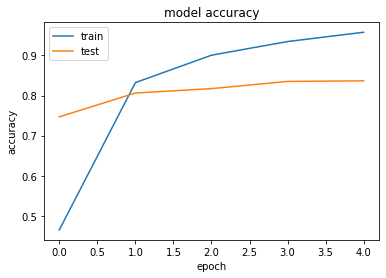

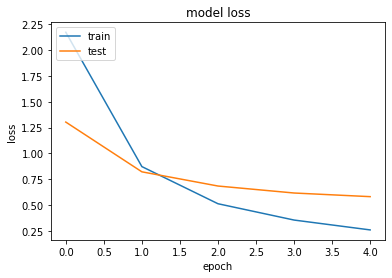

In [1]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from keras.layers.embeddings import Embedding
from keras.layers import Flatten


twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
y = twenty_train.target
sentences = twenty_train.data

max_review_len = max([len(s.split()) for s in sentences])


tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

sentences = tokenizer.texts_to_matrix(sentences)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

input_dim = 2000

# Build model
model = Sequential()
model.add(layers.Dense(300, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(20,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, verbose=True, validation_data=(X_test, y_test), batch_size=256)

# Output
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss: {}".format(loss))
print("Accuracy: {}".format(accuracy))


# Bonus Part
# For Accuracy Values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# For Loss Values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()